### Exploratory Data Analysis / Разведывательный анализ данных

На этом этапе:
1. Получение базовой информации  о датасете
2. Построение распределений числовых признаков
3. Простроение распеделений категориальных признаков
4. Сигментация
5. Исследование корреляции числовых признаков

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.colors import ListedColormap

In [2]:
conn = sqlite3.connect('db\cian.db') 
          
df = pd.read_sql_query ('''
                               SELECT *
                               FROM ad_data
                               ''', conn)


In [3]:
df = df.drop(columns=['link', 'description_text'])

## 1. Получение базовой информации о датасете

In [4]:
# размерность таблицы
df.shape

(89184, 36)

In [40]:
# типы данных столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   flat_type                 89184 non-null  object 
 1   rooms                     89184 non-null  int64  
 2   price                     89184 non-null  int64  
 3   sale_type                 81409 non-null  object 
 4   mortgage                  89184 non-null  int64  
 5   area                      89182 non-null  float64
 6   living_area               68621 non-null  float64
 7   kitchen_area              72920 non-null  float64
 8   floor                     89184 non-null  int64  
 9   floors                    89184 non-null  int64  
 10  built_year                82250 non-null  float64
 11  address                   89184 non-null  object 
 12  district                  89184 non-null  object 
 13  metro_station             85485 non-null  object 
 14  seller

Наблюдения характеризуются 36 признаками: числовыми и категориальными.
Фильтрация категориальный признаков:

In [7]:
print(df.dtypes[df.dtypes=='object'])
print(f"Всего {len(df.dtypes[df.dtypes=='object'])} категориальных признака")

flat_type                   object
sale_type                   object
address                     object
district                    object
metro_station               object
seller                      object
housing_type                object
planning                    object
bathroom                    object
balcony_loggia              object
repair                      object
view                        object
finished_shell_condition    object
house_type                  object
house_class                 object
parking                     object
elevators                   object
housing_line                object
floor_type                  object
heating                     object
unsafe_house                object
garbage_disposal            object
gas_supply                  object
dtype: object
Всего 23 категориальных признака


In [6]:
# фильтрация числовых признаков
df.select_dtypes(include=np.number).columns.tolist()

['rooms',
 'price',
 'mortgage',
 'area',
 'living_area',
 'kitchen_area',
 'floor',
 'floors',
 'built_year',
 'ceiling_height',
 'building_number',
 'entrance_number',
 'is_suspicious']

In [5]:
# первые 5 строк фрейма данных
df.head(5)

,flat_type,rooms,price,sale_type,mortgage,area,living_area,kitchen_area,floor,floors,...,parking,elevators,housing_line,floor_type,entrance_number,heating,unsafe_house,garbage_disposal,gas_supply,is_suspicious
0,квартира,0,2850000,свободная продажа,0,14.5,12.0,NaN,2,4,...,None,None,None,None,NaN,None,None,None,None,0
1,квартира,0,3551000,свободная продажа,1,11.9,NaN,1.0,2,4,...,наземная,есть,None,None,NaN,None,None,None,None,0
2,квартира,1,4700000,альтернатива,1,29.0,11.0,9.0,2,4,...,наземная,None,None,None,NaN,None,нет,None,None,0
3,квартира,0,3500000,свободная продажа,0,12.0,NaN,NaN,1,9,...,наземная,есть,ii-49,железобетонные,8.0,центральное,нет,есть,автономное,0
4,апартаменты,1,4400000,свободная продажа,1,38.0,NaN,NaN,3,14,...,None,2 пасс.,и-209а,железобетонные,3.0,центральное,нет,есть,None,0


In [8]:
# последние 5 строк фрема данных
df.tail(5)

,link,flat_type,rooms,price,sale_type,mortgage,area,living_area,kitchen_area,floor,...,elevators,housing_line,floor_type,entrance_number,heating,unsafe_house,garbage_disposal,gas_supply,description_text,is_suspicious
89179,https://www.cian.ru/sale/flat/278615692/,квартира,0,6990000,свободная продажа,0,14.1,7.0,2.0,4,...,None,None,None,2.0,None,нет,нет,None,Продается квартира студия! \nДом полностью отр...,0
89180,https://www.cian.ru/sale/flat/273736956/,квартира,0,7499000,свободная продажа,1,19.8,NaN,5.1,16,...,None,None,None,NaN,None,None,None,None,Продается светлая и функциональная студия в ЖК...,0
89181,https://www.cian.ru/sale/flat/277154320/,квартира,0,7500000,свободная продажа,0,32.0,20.0,7.0,3,...,есть,None,None,NaN,None,нет,None,None,Код объекта: 460170.\nПродается светлая и прос...,0
89182,https://www.cian.ru/sale/flat/278932365/,квартира,0,7570000,свободная продажа,1,20.0,NaN,5.0,3,...,None,None,None,NaN,None,нет,None,None,Продается отличная квартира на третьем этаже 5...,0
89183,https://www.cian.ru/sale/flat/271221445/,апартаменты,0,68628000,свободная продажа,1,172.0,NaN,NaN,1,...,"1 пасс., 1 груз.",None,None,1.0,None,нет,None,None,Привлекательное предложение для покупки апарта...,0


In [44]:
# проверка на наличие пропущенных значений для каждого столбца
print(df.isnull().any())

flat_type                   False
rooms                       False
price                       False
sale_type                    True
mortgage                    False
area                         True
living_area                  True
kitchen_area                 True
floor                       False
floors                      False
built_year                   True
address                     False
district                    False
metro_station                True
seller                      False
housing_type                 True
planning                     True
ceiling_height               True
bathroom                     True
balcony_loggia               True
repair                       True
view                         True
finished_shell_condition     True
house_type                   True
house_class                  True
building_number              True
parking                      True
elevators                    True
housing_line                 True
floor_type    

In [45]:
# столбцы с пропущенными значениями
df.isnull().sum().sort_values(ascending=False)

gas_supply                  78351
housing_line                73504
building_number             71982
house_class                 71982
finished_shell_condition    68823
garbage_disposal            64105
planning                    59358
floor_type                  58631
heating                     57897
entrance_number             56695
balcony_loggia              54040
parking                     54032
elevators                   49613
unsafe_house                47174
repair                      44272
ceiling_height              43081
view                        37833
house_type                  35582
bathroom                    26989
living_area                 20563
kitchen_area                16264
housing_type                12639
sale_type                    7775
built_year                   6934
metro_station                3699
area                            2
flat_type                       0
rooms                           0
seller                          0
district      

<AxesSubplot:>

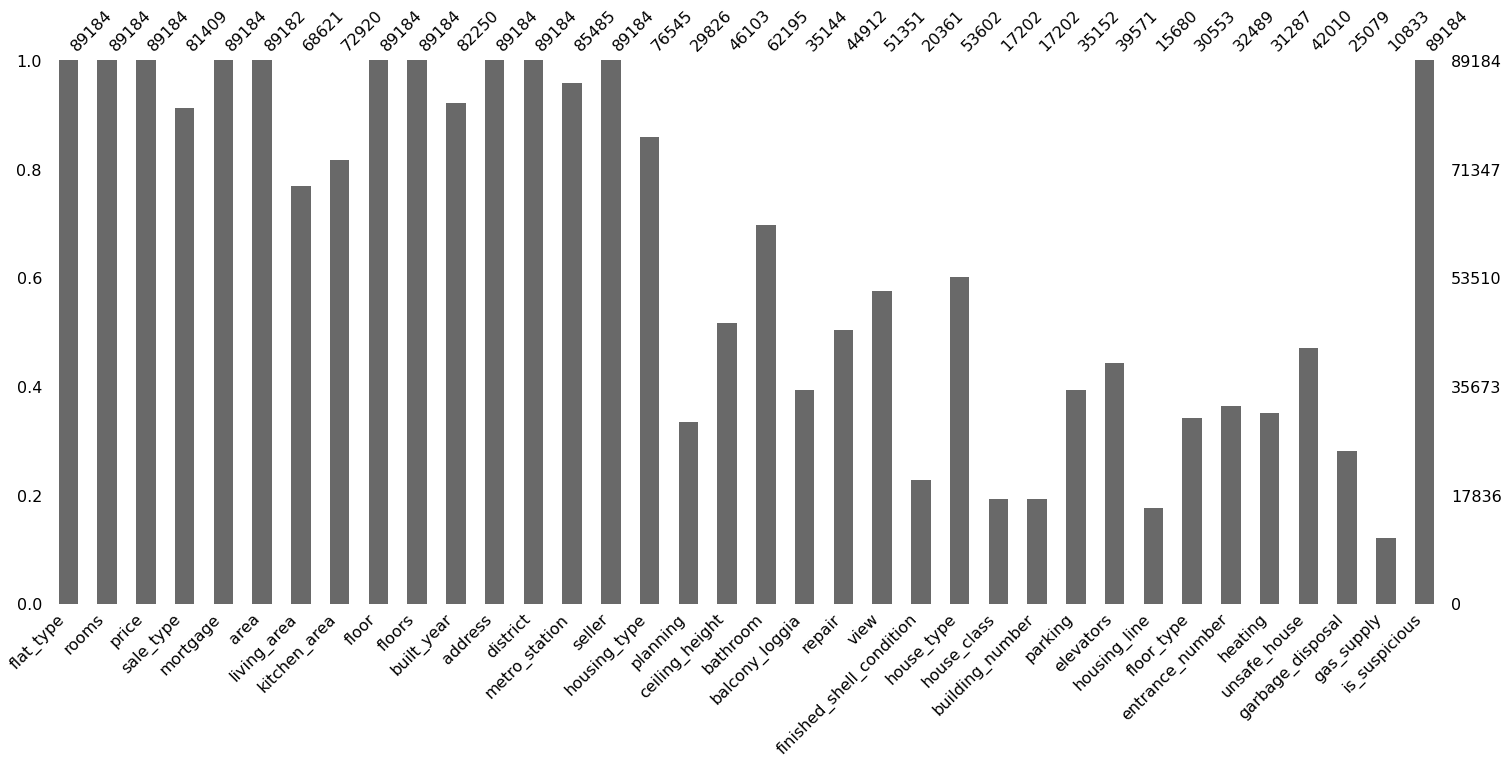

In [46]:
# гистограмма непропущенных значений для каждого столбца
msno.bar(df)

<AxesSubplot:xlabel='column_name'>

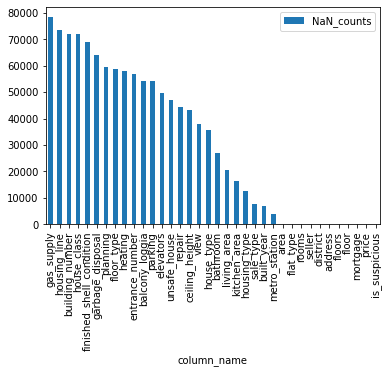

In [56]:
# гистограмма пропущенных значений
missing_data_in_df=pd.DataFrame({'column_name': df.columns, 'NaN_counts': df.isna().sum()}).sort_values(by=['NaN_counts'], ascending=False)
missing_data_in_df.plot.bar(x="column_name")

In [57]:
ds_missing = df.isna().mean().round(5) * 100
ds_missing.sort_values(ascending=False)

gas_supply                  87.853
housing_line                82.418
building_number             80.712
house_class                 80.712
finished_shell_condition    77.170
garbage_disposal            71.879
planning                    66.557
floor_type                  65.742
heating                     64.919
entrance_number             63.571
balcony_loggia              60.594
parking                     60.585
elevators                   55.630
unsafe_house                52.895
repair                      49.641
ceiling_height              48.306
view                        42.421
house_type                  39.897
bathroom                    30.262
living_area                 23.057
kitchen_area                18.236
housing_type                14.172
sale_type                    8.718
built_year                   7.775
metro_station                4.148
area                         0.002
flat_type                    0.000
rooms                        0.000
seller              

Столбец gas_supply имеет больше всего пропущенных значений. 

Минимальное количество пропущенных значений имеет столбец area (всего 2). После проверки соотвествующих ссылок оказалось, что это объявления о продаже комнат в квартире, поэтому данные строки можно удалить из выборки. 

Столбцы flat_type, address, district, seller не имют пропущенных значений.

Параметры housing_line и building_number имеют 82.418% и 80.712% пропущенных значений соотвественно, эти признаки нужно удалить.


## 2. Построение распределений числовых признаков

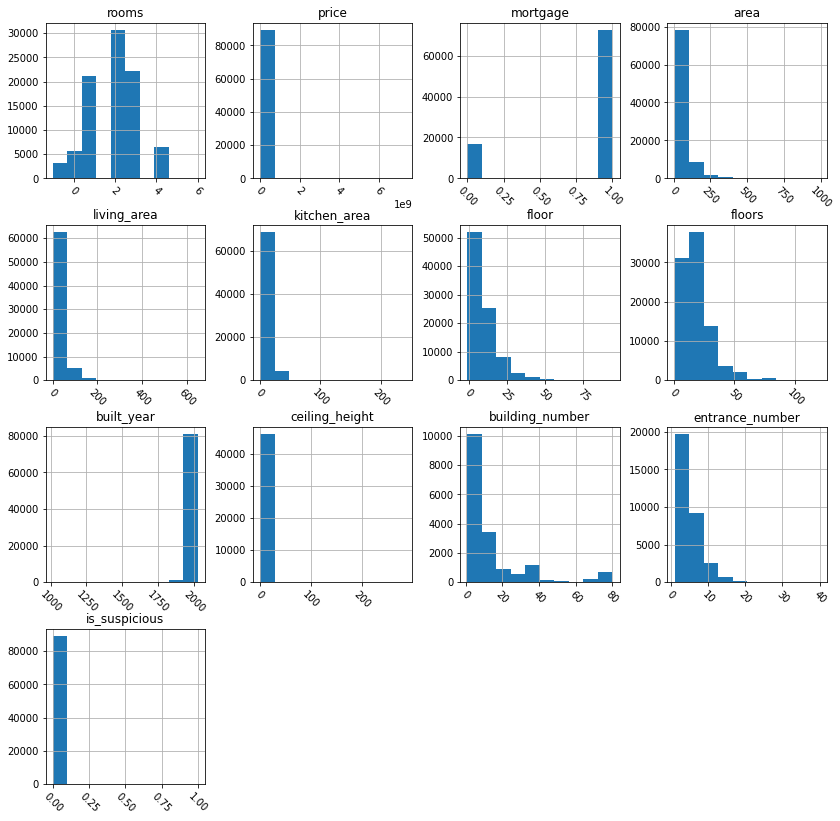

In [12]:
# гистограммы числовых данных
df.hist(figsize=(14,14), xrot=-45)
plt.show()

Больше всего в Москве продается 2-комнатных квартир, меньше всего - многокомнатных.
Наибольшее количество квартир лежит в диапазоне стоимости от 0 до 800 млн руб (больше 89000) и в диапазоне площади - от 7 до 100 кв м (больше 75000).
Большинство значений жилой площади и площади кухни находятся в диапазоне от 0 до 50 и от 0 до 25 кв м соответственно.

Более 70000 квартир имеют возможность покупки в ипотеку или рассрочку.

Гистограммы года постройки и высоты потолков непоказательны, вероятно, из-ща ниличия выбросов.

Подавляющее большинство объявлений неподозрительные.

In [7]:
# описательная статистика для числовых столбцов
df.describe()

,rooms,price,mortgage,area,living_area,kitchen_area,floor,floors,built_year,ceiling_height,building_number,entrance_number,is_suspicious
count,89184.000,8.918e+04,89184.000,89182.000,68621.000,72920.000,89184.000,89184.000,82250.000,46103.000,17202.000,32489.000,8.918e+04
mean,1.924,3.235e+07,0.812,69.741,37.089,12.516,9.501,18.689,2003.081,2.972,13.246,4.585,9.419e-04
std,1.159,5.960e+07,0.391,52.163,29.805,7.421,8.631,12.261,27.354,1.537,17.750,3.399,3.068e-02
min,-1.000,9.650e+03,0.000,7.600,0.500,0.600,-1.000,1.000,1016.000,0.000,1.000,1.000,0.000e+00
25%,1.000,1.170e+07,1.000,40.400,20.000,7.700,3.000,9.000,1983.000,2.680,3.000,2.000,0.000e+00
50%,2.000,1.708e+07,1.000,57.100,30.500,10.200,7.000,16.000,2018.000,2.950,7.000,4.000,0.000e+00
75%,3.000,3.060e+07,1.000,79.300,44.500,16.000,13.000,24.000,2023.000,3.100,12.000,6.000,0.000e+00
max,6.000,7.350e+09,1.000,993.600,650.000,240.000,94.000,120.000,2027.000,285.000,80.000,40.000,1.000e+00


Минимальная стоимость квартиры составляет 9650 руб, что несмотря на то, что такое объявления действительно существует, является нереалистичным (скорее всего, пользователь опечатался). Данное объявление нужно удалить из выборки. Маскимальная стоимость жилья в Москве - 7,35 млрд руб.

Минимальная площадь равняется 7,6 кв м, максимальная - 993,6 кв м.

Подозрительно малыми являются минимальные значения жилой площади (living_area), площади кухни (kitchen_area), однако они соответствуют дейтсвительности (в апартаментах студийной планировки с малой площадью по полу).

Одна квартира представляет собой подвальное помещение, поэтому минимальное значений этажа равно -1.

Максимальная этажность дома 120 этажей, минимальная - 1 этаж.
Минимальный год постройки 1016, что является ошибкой (в действительности в объявлении указан 2014).
Максимальная высота потолков составляет 285 и , скорее всего, указана в сантимантрах, а не в метрах. Минимальная - 0, что равноценно null-значению. При исправлении столбца ceiling_height нужно учитывать, что, согласно СНиП, высота потолков в жилых помещениях должна быть не меньше 2,5 метров.
Максимальное количество подъездов - 40, хотя данный дом имеет только 2 подъезда.



## 3. Построение распределений категориальных данных

In [49]:
# описательная статистика для категориальных столбцов
df.describe(include=['object']).T

,count,unique,top,freq
flat_type,89184,2,квартира,79183
sale_type,81409,3,свободная продажа,51741
address,89184,20177,"Москва,СВАО,р-н Марфино,ул. Академика Королева,21",346
district,89184,22,ЗАО,13307
metro_station,85485,293,Рассказовка,1764
seller,89184,6,агентство,38462
housing_type,76545,2,вторичное,48021
planning,29826,3,изолированная,24872
bathroom,62195,24,1 совмещенный,25586
balcony_loggia,35144,22,1 лоджия,15084


Квартиры преобладают над апартаментами (79 тыс из 89 тыс объявлений).
Большинство квартир представляет собой вторичную недвижимость.
Больше всего квартир (объектов) продается в ЗАО.

Тип данных признаков, которые имеют два уникальных значения и/или пропущенные значения которых можно интерпретировать как отсутсвие признака (flat_type, garbage_disposal), можно изменить на булевый (числовой: 1 и 0).

Большое число комбинаций имеют признаки: санузел (bathroom), балкон (balcony_loggia) и лифт (elevators).

Столбцы address, metro_station, elevators, housing_line содержат слишком много уникальных значений, чтобы построить удобочитаемые графики распределений, поэтому сформируем отдельный список категориальных признаков для графиков.



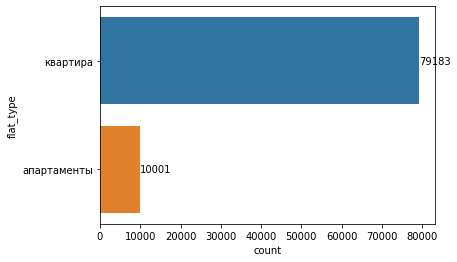

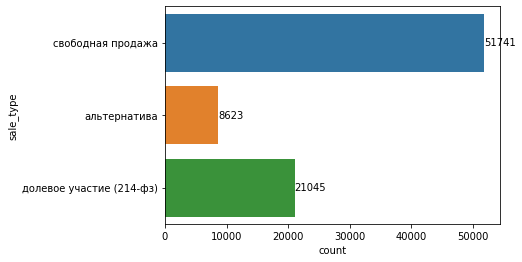

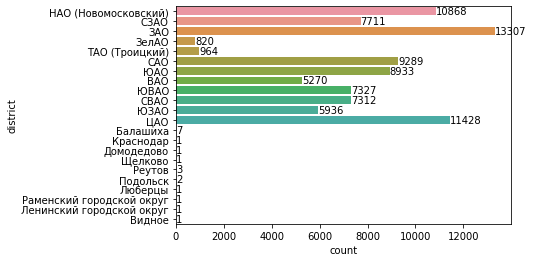

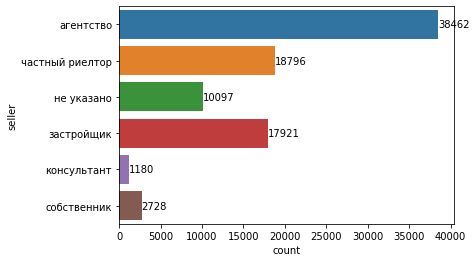

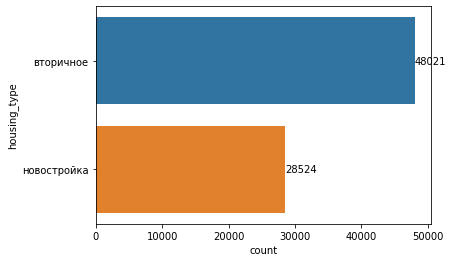

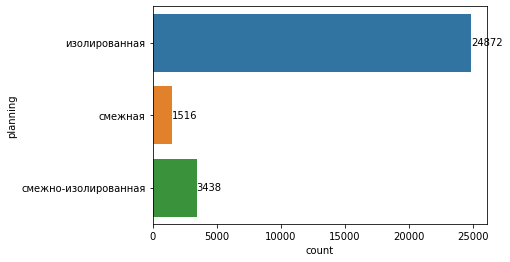

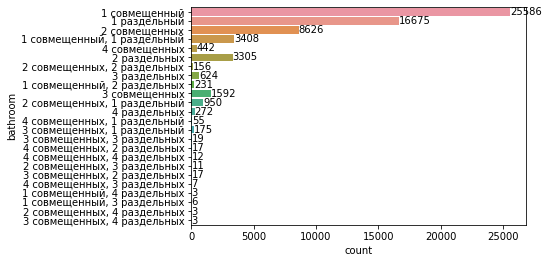

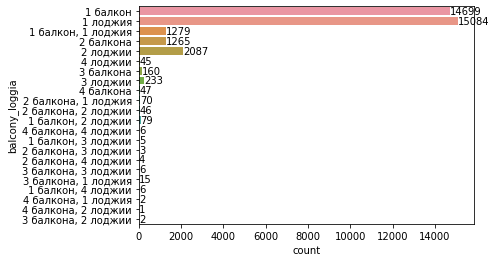

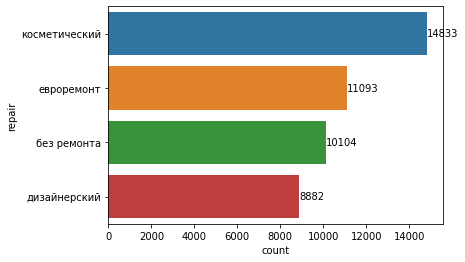

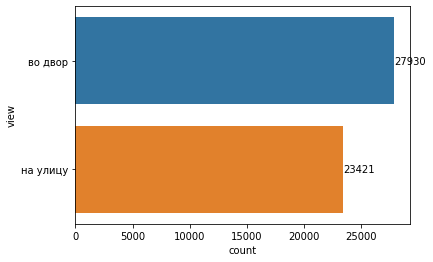

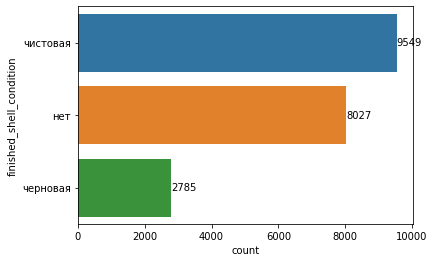

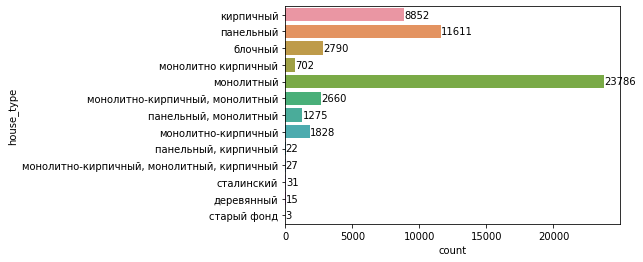

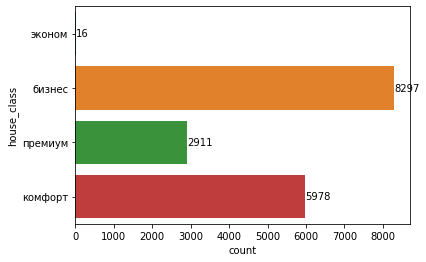

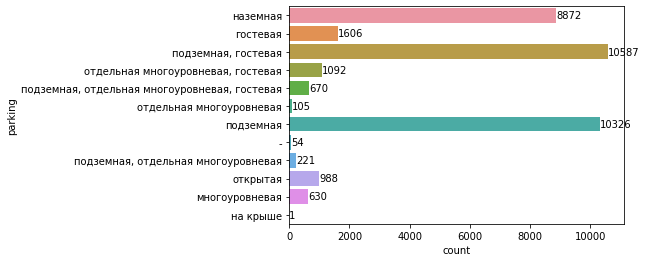

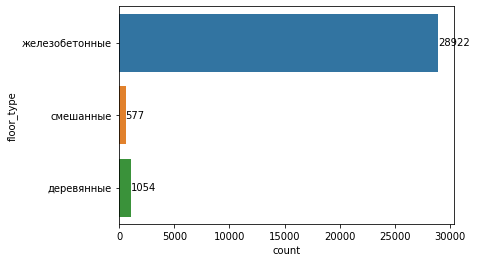

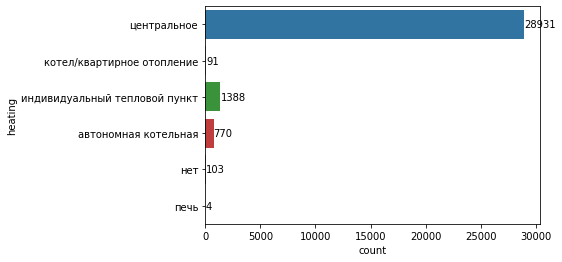

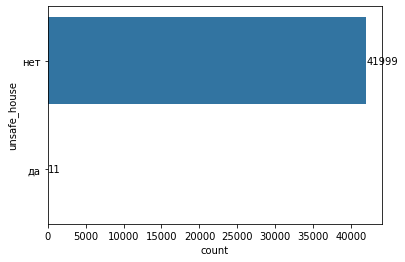

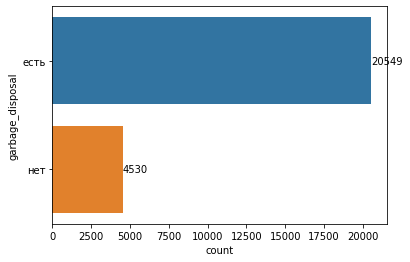

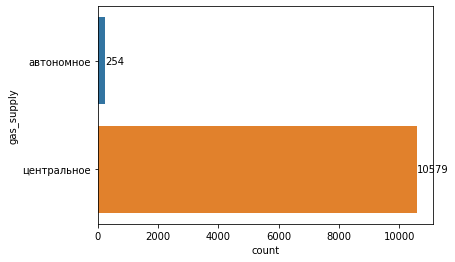

In [6]:
feature_with_many_unique_values = ['address', 'metro_station', 'elevators', 'housing_line']
categorical_features = df.dtypes[df.dtypes == 'object'].index.tolist()
features_for_plot = [feature for feature in categorical_features if feature not in feature_with_many_unique_values]
for feature in features_for_plot:
    ax = sns.countplot(y=feature, data=df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

Квартиры на рынке недвижимости практически в 8 раз больше, чем апартаментов
Вторичное жилье преобладает над новостройками почти вдвое.
Свободная продажа преобладает над альтернативной и долевым участием.

Собственники жилья предпочитают продавть квартиры через агентства недвижимости (38,5 тыс), нежели через частных риелторов (19 тыс) или самостоятельно (2,7 тыс).

Самыми распространенными вариантами санузлов является 1 совмещенный и 1 раздельный. Чем больше санузлов, тем реже они встречаются.
Наболее распросраненные варианты балконов/лоджий - это 1 балкон и 1 лоджия (около 15 тыс), однако данный признак имеет 60.594% пропущенных значений. Пропущенные значения могут означать отсутсвие балкона/лоджии, так как форма объявления на сайте позволяет отметить только их наличие. Но данный параметр не является обязательным для заполнения, поэтому возможны случаи, когда значение пропущено, но в реальности балкон/лоджия есть.

Число квартир с видом во двор и на улицу примерно одинаково. Данный признак имеет 42.421% пропущенных значений, кроме того, отсутствуют значения "на улицу и двор". Признак view нужно удалить.

По типу дома (house_type) лидируют квартиры в монолитных домах, за ними следуют квартиры в панельныйх домах. Кроме того, из гистограммы видно, что некоторые значения признака повторяются: "монолитно кирпичный", "монолитно-кирпичный, монолитный", "монолитно-кирпичный", "монолитно-кирпичный, монолитный, кирпичный" - их можно объединить в одну категорию "монолитно-кирпичный". Также необъодимо проверить объявления со значениями "сталинский" (материал несущих стен - кирпич), "деревянный" (материал несущих стен - дерево) и "старый фонд" (скорее всего, стены кирпичные) по году постройки и, возможно, этажности.

Параметр "парковка" (parking) имеет 12 значений, среди которых лидируют "пожземная, гостевая", "подземная" и "наземная". Всего 1 раз встречается парковка на крыше. Также присутствует значение "-", что, вероятно, означает отсутствие организованной парковки. Параметр parking имеет 60.585% пропущенных значений. Пропущенные значения (и "-") в данном случае можно рассматривать как наличие наземной стихиной парковки.

Большинство квартир имеет железобетонные перекрытия (floor_type). Также параметр floor_type может принимать значения "смешанные" и "деревянные" и имеет 65.742% пропущенных значений, поэтому данный признак нужно удалить.

Около 30 тыс. объявлений содержат информацию об отоплении (heating). Большая часть квартир отаплмвается централизованно, помимо этого heating принимает значения "котел/квартирное отопление", "индивидуальный тепловой пункт", "автономная котельная", "нет" и "печь". Параметр heating имеет 64.919% пропущенных значений, однако теплофикация в Москве единая и централизованная, поэтому пропущенные значения можно заменить на "центральное". Кроме того, "центральное" является самым распространенным значением, и полное отсутствие отопления в квартире невозможно, поэтому значение "нет" также можно заменить на "центральное".

Около 30 тыс. квартир имеют мусоропровод, однако признак garbage_disposal имеет 71.879% пропущенных значений, поэтому его нужно удалить.

Столбец gas_supply содержит больше всего пропущенных значений (87.853%), при этом он имеет три уникальных значений ("автономное", "центральное" и null). Пользователи Циан не всегда заполняют все поля объявления и нередко ошибаются, поэтому null значение не гарантирует отсутсвие газоснабжения, и данный признак нужно удалить.

### Дополнительное совместное исследование распределений некоторых признаков

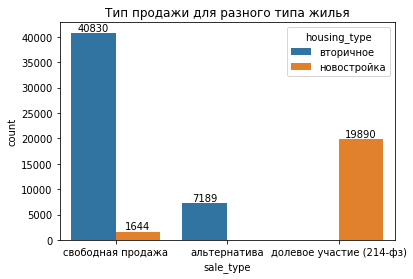

In [50]:
# распредение признака sale_type в зависимости от типа жилья (housing_type)
f, ax = plt.subplots()
ax = sns.countplot(data=df, x="sale_type", hue="housing_type")
ax.set(title='Тип продажи для разного типа жилья')
sns.move_legend(ax, "upper right")
for container in ax.containers:
        ax.bar_label(container)
plt.show()

Предположение: так как планировка (planning) отражает отностительное расположение комнат и имеет только три значения: "изолированная", "смежная" и "смежно-изолированная", данный параметр не может присутствовать у 1-квартир, квартир свободной планировки и студий. 

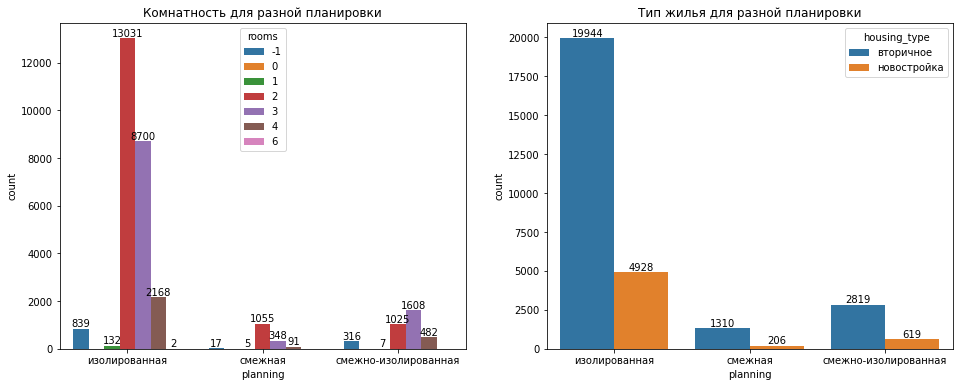

In [27]:
# распределение признака planning в зависимости от комнатности и типа жилья (housing_type)
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax_1 = sns.countplot(data=df, x="planning", hue="rooms", orient='v' , ax=axes[0])
ax_1.set(title='Комнатность для разной планировки')
for container in ax_1.containers:
        ax_1.bar_label(container)
ax_2 = sns.countplot(data=df, x="planning", hue="housing_type", orient='v' , ax=axes[1])
ax_2.set(title='Тип жилья для разной планировки')
for container in ax_2.containers:
        ax_2.bar_label(container)
plt.show()

Признак planning имеет 66.557% пропущенных значений, присутствует и в объявлениях о вторичным жилье, и о новостройках. Кроме того, для каждого значения planning есть 1-комнатные квартиры и квартиры свободной планировки, что связно с ошибками пользователей при заполнении обяъвления. Таким образом, признак planning нужно удалить.

Предположение: параметры ремонт (repair) и отделка (finished_shell_condition) имеют одинаковые значения, но относятся к разным типам жилья (отделка - к новостройкам, ремонт - к вторичному жилью), поэтому признак finished_shell_condition не должен иметь значений для вторичного жилья и наоборот.

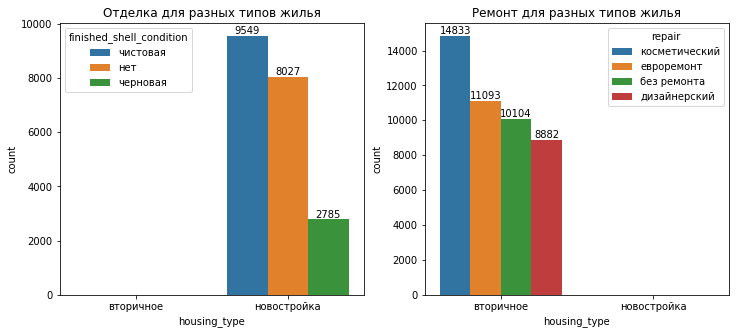

In [26]:
# распределение признаков repair и finished_shell_condition в зависимости от типа жилья (housing_type)
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax_1 = sns.countplot(data=df, x="housing_type", hue="finished_shell_condition", orient='v' , ax=axes[0])
ax_1.set(title='Отделка для разных типов жилья')
sns.move_legend(ax_1, "upper left")
for container in ax_1.containers:
        ax_1.bar_label(container)
ax_2 = sns.countplot(data=df, x="housing_type", hue="repair", orient='v' , ax=axes[1])
ax_2.set(title='Ремонт для разных типов жилья')
sns.move_legend(ax_2, "upper right")
for container in ax_2.containers:
        ax_2.bar_label(container)
plt.show()

finished_shell_condition не имеет значений для вторичного жилья, а repair - для новостроек, поэтому эти признаки можно объединить. Это уменьшит количество пропущенных значений: новый столбей бедет иметь 65273 значения (26.811% пропущенных значений по сравнению 60.585% repair и 77.170% finished_shell_condition сейчас).

Кроме того, важно заметить, что значение "нет" в finished_shell_condition означает "без отделки", а не пропущенное значение.

Предположение: сталинские дома (house_type) должны быть построены примерно с 1933 года до 1961 и иметь 2 - 12 этажей. Деревянные дома дожны быть малой этажности и раннего года посройки (если не находятся в частном секторе). Скорее всего, под такими домами подразумеваются кирпичные дома с деревянными перекрытиями. Старый фонд - это дореволюционные дома с 2 - 7 этажами, расположенные в центре.

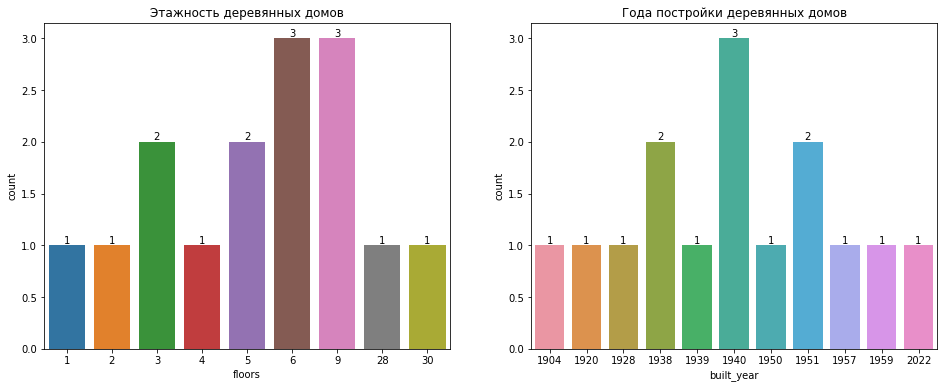

In [28]:
# распределение квартир деревянных домов в зависимости от этажности и года постройки (housing_type)
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax_1 = sns.countplot(data=df.loc[df['house_type']=='деревянный'], x='floors', orient='v' , ax=axes[0])
ax_1.set(title='Этажность деревянных домов')
for container in ax_1.containers:
        ax_1.bar_label(container)
ax_2 = sns.countplot(data=df.loc[df['house_type']=='деревянный'], x='built_year', orient='v' , ax=axes[1])
ax_2.set(title='Года постройки деревянных домов')
ax_2.set_xticklabels([(int(float(t.get_text()))) for t in ax_2.get_xticklabels()])
for container in ax_2.containers:
        ax_2.bar_label(container)
plt.show()

Дом с этажностью 30 этажей не являются деревянными и построен в 2022, поэтому в соотвествующем обяъвления нужно изменить house_type на null. Объявление квартиры в в 28-этажном доме (новостройке 2019 года, в объявлении - 1928 год) нужно также изменить (house_type на null). После проверки объявлений оказалось, что ни одна из оставшихся квартир не находится в доме с деревянными стенами, все эти дома кирпичные, поэтому параметр house_type этих объявлений нужно изменить на "кирпичный".

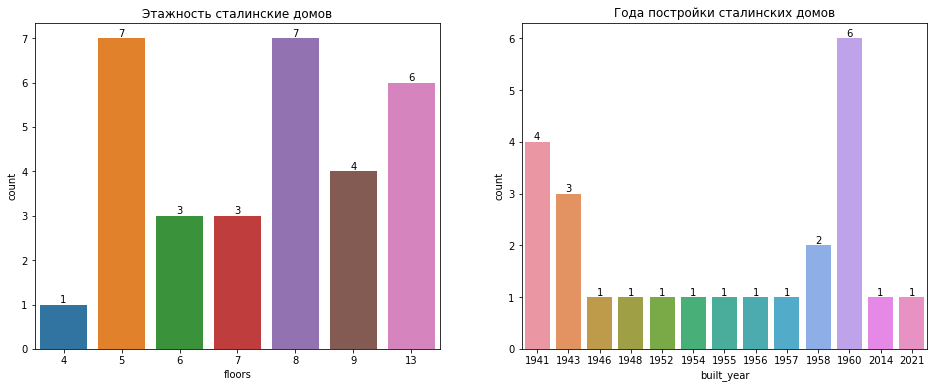

In [29]:
# распределение квартир сталинских домов в зависимости от этажности и года постройки (housing_type)
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax_1 = sns.countplot(data=df.loc[df['house_type']=='сталинский'], x='floors', orient='v' , ax=axes[0])
ax_1.set(title='Этажность сталинские домов')
for container in ax_1.containers:
        ax_1.bar_label(container)
ax_2 = sns.countplot(data=df.loc[df['house_type']=='сталинский'], x='built_year', orient='v' , ax=axes[1])
ax_2.set(title='Года постройки сталинских домов')
ax_2.set_xticklabels([(int(float(t.get_text()))) for t in ax_2.get_xticklabels()])
for container in ax_2.containers:
        ax_2.bar_label(container)
plt.show()

В действительности дом с указанным годом постройки 2021 построен в 1954 году и является сталинским (при этом имеет кирпичные стены), с 2014 - реальный год постройки 2014 (house_type на 'монолитный'). 13-этажный дом является сталинским. Сталинские дома имеют кирпичные стены, поэтому house_type нужно изменить на "кирпичный".

In [37]:
# квартиры в домах старого фонда
df[['floors', 'built_year']].loc[df['house_type']=='старый фонд']

,floors,built_year
75864,4,1910.0
85544,7,1913.0
87662,9,NaN


В реальности только первые две квартиры находтся в старом фонде, и эти дома являются кирпичными. Последняя квартира находится в 9-этажном панельном доме. 

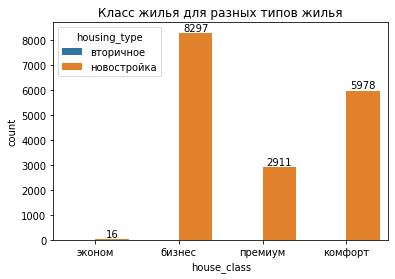

In [69]:
# распределение признаков house_class в зависимости от типа жилья (housing_type)
f = plt.subplots()
ax = sns.countplot(data=df, x="house_class", hue="housing_type")
ax.set(title='Класс жилья для разных типов жилья')
sns.move_legend(ax, "upper left")
for container in ax.containers:
        ax.bar_label(container)
plt.show()

Параметр "класс жилья" присутствует только в объявлениях квартир в новостройках. Однако не все квартиры в новостройках имеют этот параметр. Кроме того, всего house_class имеет 80.712% пропущенных значений. house_class нужно удалить.

 Необходимо дополнительно проверить объявления, в которых указано квартирное и печное отопление. 
 Предположение: квартирное отопление характерно для квартир в Новой Москве.

In [5]:
# квартиры в домах с печным отоплением
df[['rooms', 'floors', 'built_year', 'unsafe_house']].loc[df['heating']=='печь']

,rooms,floors,built_year,unsafe_house
59427,2,19,2007.0,нет
62435,3,5,1978.0,нет
63273,2,9,1964.0,нет
79198,3,5,1929.0,нет


Во всех обявлениях "печь" в качестве источника отопления была укзана ошибочно. Значения heating в этих объявлениях нужно заменить на "центральное".

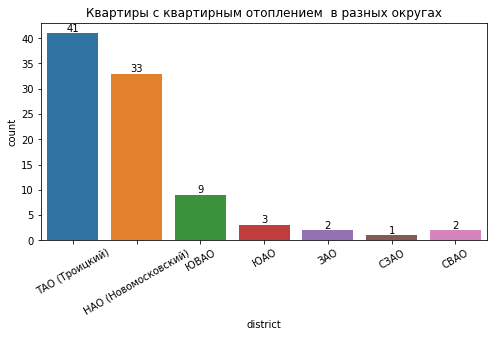

In [32]:
# распределение признака heating (со значением "котел/квартирное отопление") в зависимости от округа (district)
f = plt.subplots(figsize=(8,4))
ax = sns.countplot(data=df.loc[df['heating']=='котел/квартирное отопление'], x='district')
ax.set(title='Квартиры с квартирным отоплением  в разных округах')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
for container in ax.containers:
        ax.bar_label(container)
plt.show()

Квартиры в квартирным отопление зачастую расположены в округах Новой Москвы.

In [13]:
# подробная информация о квартирах в аварийных домах
df[[ 'built_year', 'rooms', 'floors', 'address']].loc[df['unsafe_house']=='да'].sort_values('built_year')

,built_year,rooms,floors,address
44536,1963.0,2,14,"Москва,НАО (Новомосковский),Рязановское поселе..."
57555,1963.0,2,17,"Москва,НАО (Новомосковский),Рязановское поселе..."
56848,2009.0,2,12,"Москва,НАО (Новомосковский),Рязановское поселе..."
68642,2021.0,3,17,"Москва,НАО (Новомосковский),Рязановское поселе..."
33062,2022.0,1,17,"Москва,НАО (Новомосковский),Рязановское поселе..."
34173,2022.0,1,15,"Москва,НАО (Новомосковский),Рязановское поселе..."
43664,2022.0,1,15,"Москва,НАО (Новомосковский),Рязановское поселе..."
44626,2022.0,2,15,"Москва,НАО (Новомосковский),Рязановское поселе..."
45111,2022.0,2,15,"Москва,НАО (Новомосковский),Рязановское поселе..."
60530,2022.0,2,15,"Москва,НАО (Новомосковский),Рязановское поселе..."


Признак unsafe_house (аварийность дома) только в 11 случаях принимает значение "да", из которых 8 квартир расположены в новых (многоэтажных) домах. Кроме того, у всех этих квартир одинаковый адрес. Признак unsafe_house является ненадежным и его нужно удалить.

In [5]:
# уникальные значения признака elevators (лифты)
print(f"Признак elevators принимает значения: {df['elevators'].unique()}, всего {len(df['elevators'].unique())} значений")

Признак elevators принимает значения: [None 'есть' '2 пасс.' 'есть грузовой' '12 всего' '1 пасс., 1 груз.'
 '2 пасс., 1 груз.' '2 пасс., 2 груз.' '1 пасс., 2 груз.' '30 всего'
 '3 пасс.' '3 груз.' '9 всего' '3 пасс., 1 груз.' '3 пасс., 3 груз.'
 '4 пасс., 2 груз.' '3 пасс., 2 груз.' '2 всего' '24 всего' '14 всего'
 '4 пасс., 1 груз.' '1 пасс., 3 груз.' '4 всего' '4 пасс.'
 '4 пасс., 4 груз.' '3 всего' '22 всего' '70 пасс.' '17 всего' '50 пасс.'
 '2 груз.' '15 всего' '11 всего' '29 всего' '10 всего' '1 пасс., 12 груз.'
 '6 всего' '5 всего' '6 пасс.' '20 всего' '7 всего' '8 всего' '18 всего'
 '16 всего' '5 пасс., 1 груз.' '5 пасс., 4 груз.' '32 всего' '5 пасс.'
 '6 пасс., 2 груз.' '2 пасс., 4 груз.' '4 пасс., 3 груз.' '26 всего'
 '28 всего' '27 всего' '2 пасс., 3 груз.' '120 всего' '4 груз.'
 '8 пасс., 1 груз.' '21 всего' '40 всего' '13 всего' '70 всего'
 '3 пасс., 4 груз.' '1 пасс., 4 груз.' '46 всего' '30 пасс.'
 '5 пасс., 2 груз.' '55 пасс.' '6 пасс., 4 груз.' '19 всего'
 '6 пасс., 1 

Признак elevators имеет 79 уникальных значений, некоторые из которых равнозначны ('2 всего' и '1 пасс., 1 груз.'; '3 пасс., 1 груз.', '2 пасс., 2 груз.', '1 пасс., 3 груз.' и '4 всего' и пр.), а также 55.630% пропущенных значений, которые нельзя принять за отсутвие в доме лифта. Поэтому этот признак нужно удалить.

4. Сигментация

<AxesSubplot:xlabel='price', ylabel='flat_type'>

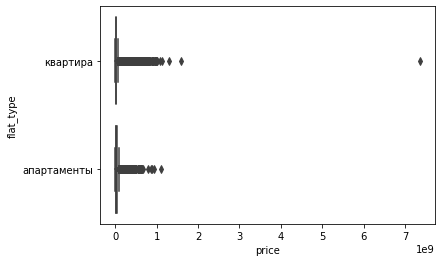

In [36]:
# коробчатая диаграмма цены в зависимости от типа квартиры/собственности
sns.boxplot(x = 'price', y = 'flat_type', data= df)

Из-за большого размаха в значениях цены (9 650 и 7 350 000 000) коробчатая диаграмма оказалась непоказательной, поэтому нет смысла строить аналогичные диаграммы цены с другими категориальными признаками.

<AxesSubplot:xlabel='area', ylabel='flat_type'>

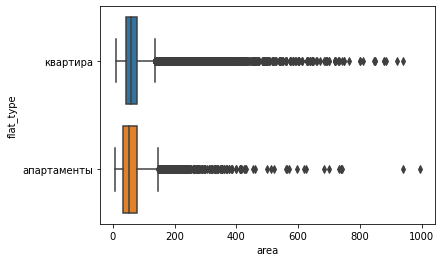

In [19]:
# коробчатая диаграмма плащади в зависимости от типа недвижимости
sns.boxplot(x='area', y='flat_type', data=df)

<AxesSubplot:xlabel='area', ylabel='housing_type'>

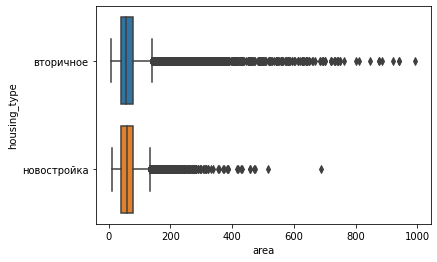

In [83]:
# коробчатая диаграмма плащади в зависимости от типа жилья
sns.boxplot(x='area', y='housing_type', data=df)

Исходя из коробчатых диаграмм, значения площади не смещены, симметричны и имеют большое количество выбросов. Диаграммы для различных типов недвижимости и жилья имеют одинаковыю форму.

<AxesSubplot:xlabel='area', ylabel='repair'>

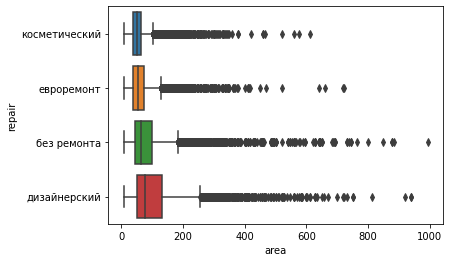

In [15]:
# коробчатая диаграмма площади в зависимости от ремонта
sns.boxplot(x='area', y='repair', data=df)

Значения площади по мере повышения класса ремонта становятся менее плотно сгрупированными, более ассиметричными, смещенными в направлении возрастания. Для всех видов ремонта характерны выбросы.

In [8]:
# сигментация по типу собственности и отображение средних значений и среднеквадратических отклонений для каждого типа
df.groupby('flat_type').agg([np.mean, np.std]).T.round(1)

C:\Temp/ipykernel_5356/1054223093.py:2: FutureWarning: ['sale_type', 'address', 'district', 'metro_station', 'seller', 'housing_type', 'planning', 'bathroom', 'balcony_loggia', 'repair', 'view', 'finished_shell_condition', 'house_type', 'house_class', 'parking', 'elevators', 'housing_line', 'floor_type', 'heating', 'unsafe_house', 'garbage_disposal', 'gas_supply'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('flat_type').agg([np.mean, np.std]).T.round(1)


flat_type             апартаменты    квартира
rooms           mean          1.5         2.0
                std           1.2         1.1
price           mean   37454330.1  31700716.4
                std    58353814.2  59721233.7
mortgage        mean          0.7         0.8
                std           0.4         0.4
area            mean         65.4        70.3
                std          57.1        51.5
living_area     mean         35.8        37.2
                std          32.8        29.5
kitchen_area    mean         12.8        12.5
                std           9.4         7.2
floor           mean         10.1         9.4
                std          12.0         8.1
floors          mean         19.7        18.6
                std          18.4        11.3
built_year      mean       2014.1      2001.8
                std          22.8        27.5
ceiling_height  mean          3.2         2.9
                std           4.0         0.8
building_number mean          2.7        14.6
                std           3.3        18.4
entrance_number mean          4.6         4.6
                std           3.5         3.4
is_suspicious   mean          0.0         0.0
                std           0.0         0.0

Значения среднеквадратических отклонений и средних числовых признаков для апартаментов и квартир мало отличаются. Значительное отличие имеют средние building_number, а также срднекасреднеквадратические отклонения ceiling_height и building_number, что, скорее всего, объясняется выбросами.

In [11]:
# сигментация по типу жилья и отображение средних значений для каждого типа
df.groupby('housing_type').mean().round(1)

,rooms,price,mortgage,area,living_area,kitchen_area,floor,floors,built_year,ceiling_height,building_number,entrance_number,is_suspicious
housing_type,,,,,,,,,,,,,
вторичное,2.0,35673195.9,0.8,74.1,40.6,11.4,8.4,15.9,1992.5,2.9,NaN,4.6,0.0
новостройка,1.9,28377227.4,0.8,63.4,30.2,15.1,11.8,24.1,2023.2,3.0,13.2,NaN,0.0


В целом, большинство средних значений числовых признаков для вторичного жилья и новостроек отличиаются незначительно. Исключение составляют этажность (новостройки в среднем выше вторичных домов на 8 этажей) и год постройки (отражается само понятие новостроек, причем среднее значений built_year для новостроек - будущий год).

In [4]:
# сигментация по округам Москвы и вычисление средних, минимальных и максимальных значений, а также среднеквадратического отклонения
df_district_price = df.groupby('district')['price'].agg([np.mean, lambda x: np.std(x, ddof=0), np.min, np.max]).sort_values('mean', ascending=False)
df_district_price.rename(columns={'<lambda_0>': 'std', 'amin': 'min', 'amax': 'max'})

,mean,std,min,max
district,,,,
ЦАО,9.617949e+07,1.148937e+08,1900000,1139860000
ЗАО,3.860554e+07,4.796279e+07,3100000,1581227000
СЗАО,2.759446e+07,2.784461e+07,2300000,559666773
САО,2.567308e+07,2.674446e+07,2890000,500000000
ЮЗАО,2.266320e+07,2.084725e+07,1900000,599999999
ЮАО,2.193156e+07,1.587143e+07,9650,230000000
СВАО,1.984180e+07,1.432796e+07,2267333,184788852
ЮВАО,1.529802e+07,1.826983e+07,1300000,1299800000
ВАО,1.458284e+07,1.013899e+07,2033220,200000000


В среднем цены на квартиры в ЦАО выше и вариативнее по сравнению с другими округами. В Троицком округе самое дешешевое жилье.

Кроме того, несмотря на заданные фильтры поиска некоторые объявления не относятся к Москве (Домодедово, Люберцы, Раменский городской округ, Видное, Балашиха, Реутов, Ленинский городской округ, Краснодар, Подольск, Щелково), впоследствии их нужно удалить из выборки. Среднеквадратическое отклонение стоимости квартир в этих округах равно 0, так как это единичные случаи или несколько квартир с одинаковой ценой.

5. Исследование корреции

In [9]:
# определение коэффициентов корреляции для числовых данных
correlations = df.corr()
print(correlations)

                    rooms     price  mortgage      area  living_area  \
rooms            1.000000  0.008397 -0.000199  0.147988     0.223145   
price            0.008397  1.000000 -0.142052  0.720859     0.695135   
mortgage        -0.000199 -0.142052  1.000000 -0.141013    -0.140600   
area             0.147988  0.720859 -0.141013  1.000000     0.933214   
living_area      0.223145  0.695135 -0.140600  0.933214     1.000000   
kitchen_area     0.134542  0.385963 -0.066993  0.528805     0.341781   
floor            0.029009  0.050954 -0.043802  0.106213     0.063659   
floors           0.029239  0.003988 -0.054508  0.059742     0.007448   
built_year      -0.038802  0.025855 -0.074002  0.012118    -0.098605   
ceiling_height  -0.004200  0.081927 -0.042568  0.077973     0.057339   
building_number  0.069404 -0.108284  0.183816 -0.051889    -0.072018   
entrance_number  0.051937 -0.056289 -0.001376 -0.043211    -0.025397   
is_suspicious   -0.001133 -0.006907  0.004467 -0.009022    -0.00

C:\Temp/ipykernel_6776/1102441892.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlations, dtype=np.bool)


<AxesSubplot:>

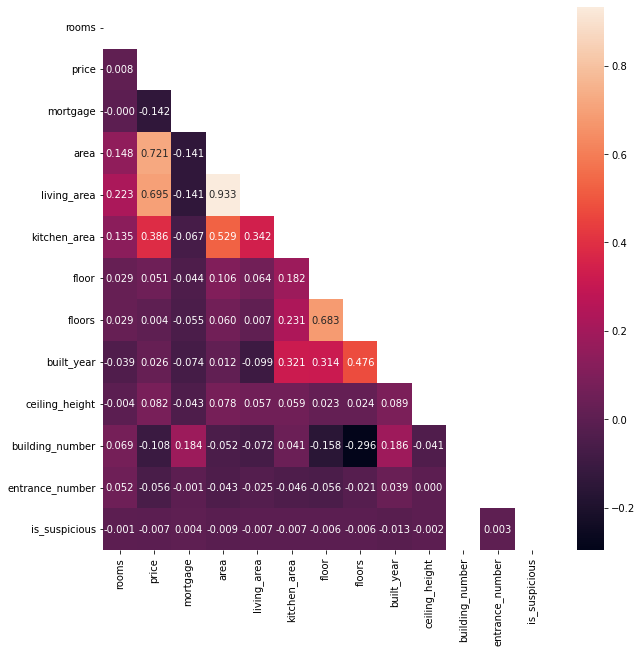

In [10]:
# тепловая карта коэффициентов корреляции числовых признаков
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True, fmt='.3f', cbar=True, mask = mask)
# with sns.axes_style("white"):
#     ax = sns.heatmap(correlations, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

In [6]:
# уникальные значения building_number для подозрительных объявлений
df['building_number'].loc[df['is_suspicious']==1].unique()

array([nan])

Между признаками is_suspicious и building_number существует линейная функциональная зависимость, так как для любого значения building_number признак is_suspicious будет равен 0, а для подозрительных обявлений нет значений building_number.

Между признаками living_area и area очень сильная положительная корреляция: чем больше жилая площадь квартиры, тем больше общая площадь и наоборот.

Между признаками area и price, living_area и price, а также floor и floors существует сильная положительная корреляция: чем больше (жилая) площадь квартиры, тем выше ее стоимость; значение этаж, на котором расположена квартира, ограничено этажностью дома.

Между признаками kitchen_area и area, built_year и floors умеренная положительная корреляция: чем больше площадь кухни, тем больше общая площадь; современные дома имеют большую этажность.

Между признаками kitchen_area и price, kitchen_area и living_area, built_year и kitchen_area, built_year и floor существует слабая корреляция, между остальными парами признаков - незначительная корреляция.

ИТОГ:


В следующем разделе необходимо:
+1. удалить два обявления с пропущенными значениями area
+2. удалить объявление с неправдопобной ценой 9 650
+3. исправить объявление с годом постройки 1016
+4. исправить ошибки в столбце ceiling_height  
+5. удалить объявления с district Домодедово, Люберцы, Раменский городской округ, Видное, Балашиха, Реутов, Ленинский городской округ, Краснодар, Подольск, Щелково
6. пропущенные значения в sale_type (8.718%), housing_type (14.172%), bathroom (30.262%) заменить на 'missing'
7. объединить столбцы repair и finished_shell_condition
+8. исправить столбец house_type
+9. заменить в столбце parking null и "-" на "стихийная"
+10. исправить столбец heating
+11. удалить столбцы: unsafe_house, garbage_disposal, elevators, housing_line, building_number, gas_supply, planning, view, house_class, floor_type, entrance_number, balcony_loggia


12. исправить повторы квартир